# ICT 782 - Day 1 Notes

# Welcome to 'Python for Data Analysis'

This course assumes a fundamental knowledge of Python programming, which many of you have obtained through ICT 781 - Python Foundations. 

In this course, we'll be focused on gaining technical skills for solving Data Analysis problems. Where necessary, we'll look at theoretical concepts to help motivate and frame our practical examples. The schedule of broad topics for this course will be as follows (subject to some change):

1. Data representation in Python - NumPy and pandas.
2. Data acquisition and cleaning.
3. Visualizations, both static and interactive.
4. Information extraction through classification and regression.

## What is Data Analysis?

This field is huge, and **Data Analysis** can mean many things. For this course, we'll adopt the following definition:

> **Data Analysis** is the process of obtaining, cleaning, transforming, and processing data with the goal of extracting useful information.

When we talk about **data**, we are usually referring to a collection of measurements of some defined type, such as numbers, words, dates, images, etc. What the data represents is *usually* clear from the context. However, data collection is often messy, imprecise, and incomplete. 

## Data sources

With the wealth of information on the internet, most of our data will come from the web. However, data could be generated in a lab, from a database, or from your own measurements.

The following websites allow access to well-curated data. Of course, when viewing data on the web, we always exercise caution and act responsibly. There are, of course, numerous other websites providing high-quality data in a wide range of fields.

* [StatsCan Data Centre](https://www150.statcan.gc.ca/n1/en/type/data?MM=1) - data is most easily accessed as `html`, but other formats are available.
* [US Census Data](https://data.census.gov/cedsci/)
* [EU Open Data Portal](https://data.europa.eu/euodp/en/home)

Now that we have some sources of data, we'll begin to investigate ways of representing data in Python.

# NumPy (Numerical Python)

Whether navigating datasets with indexing or applying models to data, mathematical operations are central to data analysis. Python comes with the `math` package, but Numerical Python (**NumPy**) is the standard for array-based or **vectorized** calculations in Python. In this module, we'll explore NumPy's core features. Some of the most attractive aspects of NumPy can be summarized as follows:

- Supports mathematical operations for real and complex numbers from simple arithmetic to fast Fourier transforms and everything in between.
- Simple Application Passing Inferface (API) based on Python object-oriented principles.
- Algorithms and operations based on optimized C and Fortran code.
- Can incorporate C/C++ and Fortran legacy code and compile to fast C.

We will import NumPy using the standard convention `import numpy as np`.

In [1]:
import numpy as np

np.__version__

'1.16.5'

## The `ndarray` data type

The pure Python `list()` data type gives a wide range of flexibility for many computing tasks. The `ndarray` class from NumPy is a similar data type with greatly expanded flexibility for numerical computation. The `ndarray` class is most useful when it is given *homogeneous* type, meaning that, unlike `list`s, all `ndarray` elements should be of the same type. Also, unlike `list`s, `ndarray`s must have their elements initialized when the `ndarray` variable is declared.

The `ndarray` object is declared using the syntax `np.array()`. A `list` object is passed as an argument to initialize an `ndarray` object.

In [2]:
# The difference between ndarrays and lists.

ex_list = [1.1, 1.2]
arr1 = np.array(ex_list)

print(ex_list, arr1)
print(type(ex_list), type(arr1))

[1.1, 1.2] [1.1 1.2]
<class 'list'> <class 'numpy.ndarray'>


In [3]:
# A list must be passed as an argument when declaring ndarrays.

empty_var = np.array()

TypeError: array() missing required argument 'object' (pos 1)

The above code results in an error, since we tried to initialize an array with nothing in it. There is a NumPy object that can be used to create an empty array, called the `np.empty()` array. However, the 'emptiness' is misleading, since the `np.empty()` array is initialized with *garbage* values. Let's take a look.

In [7]:
np.empty(4)

array([0., 0., 0., 0.])

The three most useful attributes of the `ndarray` object are:
- `shape`: a tuple with the 'shape' of the array. For example, the array `[1.1 1.2]` has shape `(2,)`, which means there are 2 elements on a single axis.
- `dtype`: the data type contained in the array.
- `ndim`: the number of dimensions used in the array. For example, the array `[1.1 1.2]` has `ndim = 1`.

In [8]:
arr1.shape, arr1.dtype, arr1.ndim

((2,), dtype('float64'), 1)

There are some other basic pre-defined `ndarray` objects to represent arrays of ones or zeros.

In [9]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

To create an array with more dimensions, pass in the desired `shape` as a tuple argument.

In [11]:
np.ones((10,10))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [12]:
np.zeros((2,2,2))

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

We will often use the array version of Python's `range()` function. In NumPy, this function is `np.arange()`.

In [13]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
np.arange(10).dtype

dtype('int32')

We may also created an array of `n` equally spaced points between `a` and `b` by using the NumPy object `np.linspace(a, b, n)`.

In [15]:
# Create 15 equally spaced points between 0 and 1.

np.linspace(0, 1, 15)

array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])

An important method of the `ndarray` class is `reshape(<shape>)`. By passing a tuple as the `shape` argument, we can form 2d arrays from 1d arrays, and vice-versa (of course, this also extends to higher dimensional arrays).

In [16]:
test = np.arange(16)
test

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [17]:
test.reshape((4,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

## Data types within `ndarray` structures

While it is possible to put mixed types inside an `ndarray`, it is not very useful. We generally use `ndarray`s for numerical computations.

Some of the common data types in `ndarray`s are listed below.

|Data Type|Details|
|---|---|
|`int`|The default setting is 32-bit signed integers (`int32`)|
|`float`|The default setting is 64-bit floats (`float64`)|
|`str`|Same as the pure Python `str` data type|
|`bool`|Same as the pure Python `bool` data type|

There are also more advanced data types if more control over memory usage is needed:

|Advanced Data Type|Details|
|---|---|
|`int8`, `int16`, `int32`, `int64`|8-, 16-, 32-, and 64-bit signed integers|
|`uint8`, `uint16`, `uint32`, `uint64`|8-, 16-, 32-, and 64-bit unsigned integers|
|`float16`|Half-precision floating point|
|`float32`, `float64`, `float128`|32-bit single-precision floating point (`float` in C); 64- and 128-bit double-precision floating-point (`double` in C or `float` in Python)|

In [18]:
np.array([1.1, 1.3, 0], dtype = 'int')

array([1, 1, 0])

In [19]:
np.array([1.1, 1.3, 0], dtype = 'float')

array([1.1, 1.3, 0. ])

In [20]:
np.array([1.1, 1.3, 0], dtype = 'str')

array(['1.1', '1.3', '0'], dtype='<U3')

In [21]:
np.array([1.1, 1.3, 0], dtype = 'bool')

array([ True,  True, False])

## Vectorized Functions

In this section, we discuss why `ndarray` objects are preferable to pure Python data types for numerical computations. Suppose we have a list of 100,000 `float`s, and we want to square each list element. We could get this done with a `for` loop or a list comprehension.

In [22]:
data = np.random.rand(100000)

# Using a for loop to square each element.
data_squared_for_loop = []
for element in data:
    data_squared_for_loop.append(element**2)
    
# Using a list comprehension to square each element.
data_squared_list_comp = [element**2 for element in data]

Each of these options are simple enough, though we have converted our result into a `list` in each case, so we may run into problems later. The calculations were also done almost instantaneously. However, when we use `ndarray`s we are presented with a third option: just square all elements at once.

In [23]:
data_squared = data**2

Not only is the syntax easier, but there are huge computational savings by using this method. We'll use the Jupyter cell magic `%%timeit` to time how long each of our three options takes.

In [24]:
%%timeit

data_squared_for_loop = []
for element in data:
    data_squared_for_loop.append(element**2)

40.6 ms ± 704 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
%%timeit

data_squared_list_comp = [element**2 for element in data]

37 ms ± 945 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
%%timeit

data_squared = data**2

78.7 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Note that the times for both the `for` loop and the list comprehension are in *milliseconds*, or thousandths of a second. The time for the vectorized function is in *microseconds*, or millionths of a second. Therefore, in this example we see that the vectorized function is 1000 times faster than the pure Python version.

Not only are vectorized functions faster, but they have simpler syntax and they eliminate the need for iterative techniques like `for` loops. Many operations are vectorized by default in NumPy. Here are some examples.

In [27]:
# Vectorized addition and subtraction.

data1 = np.array([-1.1, 2.2, -3.3, 4.4, -5.5])
data2 = np.array([4.1, -5.1, -6.1, 7.1, -8.1])

In [28]:
data1 + 1.0

array([-0.1,  3.2, -2.3,  5.4, -4.5])

In [29]:
data1 + data2

array([  3. ,  -2.9,  -9.4,  11.5, -13.6])

In [30]:
data2 - 1.0

array([ 3.1, -6.1, -7.1,  6.1, -9.1])

In [31]:
data1 - data2

array([-5.2,  7.3,  2.8, -2.7,  2.6])

In [32]:
# Vectorized scalar multiplication and division.

7*data1

array([ -7.7,  15.4, -23.1,  30.8, -38.5])

In [33]:
data1/7

array([-0.15714286,  0.31428571, -0.47142857,  0.62857143, -0.78571429])

Note that each of the above operations is done **element-wise**, meaning on each individual element. A more general term for a vectorized function that works element-wise is a **universal** function.

When two `ndarray`s with the same dimensions are multiplied together, the multiplication is done element-wise (this is sometimes called the 'Hadamard product').

**Note:** This array-array multiplication is completely different from matrix-vector and matrix-matrix multiplication.

In [34]:
data1_2d = np.array([[-1.1, 2.2, -3.3, 4.4, -5.5],[-1.1, 2.2, -3.3, 4.4, -5.5]])
data1_2d

array([[-1.1,  2.2, -3.3,  4.4, -5.5],
       [-1.1,  2.2, -3.3,  4.4, -5.5]])

In [35]:
data2_2d = np.array([[4.1, -5.1, -6.1, 7.1, -8.1],[4.1, -5.1, -6.1, 7.1, -8.1]])
data2_2d

array([[ 4.1, -5.1, -6.1,  7.1, -8.1],
       [ 4.1, -5.1, -6.1,  7.1, -8.1]])

In [36]:
data1_2d * data2_2d

array([[ -4.51, -11.22,  20.13,  31.24,  44.55],
       [ -4.51, -11.22,  20.13,  31.24,  44.55]])

In [37]:
data1_2d / data2_2d

array([[-0.26829268, -0.43137255,  0.54098361,  0.61971831,  0.67901235],
       [-0.26829268, -0.43137255,  0.54098361,  0.61971831,  0.67901235]])

In [38]:
# Vectorized exponentiation.

np.exp(data1_2d)

array([[3.32871084e-01, 9.02501350e+00, 3.68831674e-02, 8.14508687e+01,
        4.08677144e-03],
       [3.32871084e-01, 9.02501350e+00, 3.68831674e-02, 8.14508687e+01,
        4.08677144e-03]])

The above function `np.exp(x)` is the NumPy implementation of the function $e^x$. This function takes in a single argument and returns the result of using each array element as the exponent in $e^x$. Since the function takes in one argument, it is called a **unary** function. The function is vectorized to work on arrays, so we say the exponential function is **universal**.

Here is a list of universal unary functions adapted from (McKinney, 2015). Since these are universal functions, they return element-wise arrays.

|Function|Details|
|---|---|
|`np.abs()`|Compute the absolute values of elements of the argument.|
|`np.sqrt()`|Compute the square roots of elements of the argument.|
|`np.exp()`|Compute $e^x$ for each element of the argument.|
|`np.log()`, `np.log2()`, `np.log10`|Compute natural logarithm (`np.log`), or logarithm with base 2 or base 10.|
|`np.sin()`, `np.cos()`, `np.tan()`|Compute trigonometric ratios.|
|`np.arcsin()`, `np.arccos()`, `np.arctan()`|Compute inverse trigonometric ratios.|
|`np.ceil()`, `np.floor()`|Round up or down, respectively, to the nearest integer.|
|`np.rint()`|Round to the nearest integer.|

Similarly, universal functions that take in two arguments are called universal **binary** functions.

### Vectorizing Python conditional statements

There are many cases where we will want to vectorize pure Python functions containing conditional `if`/`else` statements. This can be done using the NumPy function `np.where()`. The general syntax for using this function is:
```
np.where(<condition>, <result if condition is met>, <result if condition is not met>)
```

As an example, let's declare a NumPy array of 101 values between 0 and 2. We'll then use `np.where()` to zero any element less than 0.74.

In [39]:
A = np.linspace(0,2,101)
A

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98, 2.  ])

In [40]:
np.where(A < 0.74, 0, A)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98, 2.  ])

We may also use the `np.where()` function on multi-dimensional arrays.

In [41]:
B = np.arange(16).reshape((4,4))
B

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [42]:
np.where(B < 4, B + 3, B - 3)

array([[ 3,  4,  5,  6],
       [ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

## Indexing and slicing

Indexing on `ndarray` objects is very similar to `list` indexing. The indices start at 0 and increase by 1 for each subsequent array position. For two-dimensional arrays, the indexing takes the form `[i,j]`, where `i` is the *row* index and `j` is the *column* index.

In [43]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
arr[6]

6

In [46]:
arr1 = np.array([np.arange(10), np.arange(10) + 3.0])
arr1

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]])

In [47]:
arr1[1,5]

8.0

Thus, we see that the index `[1,5]` corresponds to the element in row `1` and column `5` (keeping in mind zero indexing!).

For multidimensional arrays, the indexing works the same. That is, for an array with `n` dimensions, we may access an element by specifying `n` indices in the form $[i_0, i_1, i_2, ... , i_{n-1}]$.

**In practice,** we usually don't see arrays with more than 3 dimensions.

In [48]:
arrn = np.array([[np.arange(5), np.arange(5) + 1.2, np.arange(5) - 1.0],[np.arange(5), np.arange(5) + 2.0, np.arange(5) +1.0]])
arrn

array([[[ 0. ,  1. ,  2. ,  3. ,  4. ],
        [ 1.2,  2.2,  3.2,  4.2,  5.2],
        [-1. ,  0. ,  1. ,  2. ,  3. ]],

       [[ 0. ,  1. ,  2. ,  3. ,  4. ],
        [ 2. ,  3. ,  4. ,  5. ,  6. ],
        [ 1. ,  2. ,  3. ,  4. ,  5. ]]])

In [49]:
arrn[0,1,3]

4.2

The index `[0,1,3]` corresponds to the element in sub-array `0`, row `1`, and column `3`.

Slicing works the same as with `list` objects. We specify the 'slice' by `[first_index:last_index]`. When the first index of the slice is not specified, slicing begins from the `0` position. Similarly, when the last index of the slice is not specified, slicing ends at the `-1` or 'last' position.

**Note:** Just as with pure Python, slicing with `ndarray` objects ends at the index *before* the last index specified.

In [50]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
arr[1:8]

array([1, 2, 3, 4, 5, 6, 7])

In [52]:
arr1

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]])

In [53]:
arr1[1, :5]

array([3., 4., 5., 6., 7.])

### Boolean indexing

This very useful technique is used for either generating a boolean array or finding array elements satisfying a particular condition. In the first case, we can generate a boolean **mask** based on a given condition. This is perhaps best illustrated through an example. 

We'll create a 2d array with values between 0 and 1. From this array we'll create a boolean mask based on the condition `value > 0.5`. The mask will also be a 2d array, with `True` values where the original array values are greater than 0.5, and `False` values where the original values are less than or equal to 0.5.

In [54]:
nums = np.array([[0.1, 0.3, 0.99],[0.51, 0.49, 0.5],[0.23, 0.75, 0.39]])
nums

array([[0.1 , 0.3 , 0.99],
       [0.51, 0.49, 0.5 ],
       [0.23, 0.75, 0.39]])

In [55]:
mask = nums > 0.5
mask

array([[False, False,  True],
       [ True, False, False],
       [False,  True, False]])

This may not seem particularly useful, but recall that array-array multiplication is *element-wise*, that `True` is equivalent to `1`, and that `False` is equivalent to `0`. Therefore, we can use this boolean mask to zero elements of our array that are less than or equal to 0.5.

In [56]:
nums*mask

array([[0.  , 0.  , 0.99],
       [0.51, 0.  , 0.  ],
       [0.  , 0.75, 0.  ]])

We may also generate new arrays based on array elements that meet a specified condition. The syntax is the same as getting an array element by index, but instead of specifying an index we specify a *condition*.

We'll generate an array of elements of the above array that are greater than 0.5.

In [57]:
nums[nums > 0.5]

array([0.99, 0.51, 0.75])

In [58]:
# A second example

letters = np.array(['C','B','B','A','D','F','T','L','Z','E','R'])
letters

array(['C', 'B', 'B', 'A', 'D', 'F', 'T', 'L', 'Z', 'E', 'R'], dtype='<U1')

In [59]:
letters[letters > 'M']

array(['T', 'Z', 'R'], dtype='<U1')

### Boolean methods

We may combine the above techniques with NumPy universal functions to count the number of array elements satisfying a given condition.

For example, we can count the number of array elements in `nums` less than 0.8.

In [60]:
nums = nums.reshape((9,))
(nums < 0.8).sum()

8

We can also check the truth values of arrays using the methods `any()` and `all()`. The `any()` method checks if *any* array elements have a truth value of `True`, while the `all()` method checks if *all* array elements have a truth value of `True`.

In [61]:
nums1 = np.array([(-1)**i*i for i in range(13)])
nums1

array([  0,  -1,   2,  -3,   4,  -5,   6,  -7,   8,  -9,  10, -11,  12])

In [62]:
nums1.any()

True

In [63]:
nums1.all()

False

## Further array operations and methods

When working with 2d arrays, there may be instances where we wish to exchange the rows and columns. This is done with either the `np.transpose()` function or the `T` method of an array object.

In [64]:
arr = np.arange(16).reshape((4,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [65]:
arr.T

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

In [66]:
np.transpose(arr)

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

Note that transposing a 1d array will result in the original array. Instead, to 'swap' the rows and columns we must first define our array as an array containing an array (a 2d array with one row). Then, use the `np.swapaxes(<array>, <first_axis>, <second_axis>)` function. To swap the rows and columns, specify the first axis as `0` and the second axis as `1`.

In [67]:
arr2 = np.array([np.arange(7)])
np.swapaxes(arr2, 0, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

### *Example* - Computing a function over a grid

The concept of the special NumPy object `meshgrid` is best illustrated through an example. Suppose we want to calculate the function
$$
    f(x,y) = \frac{1}{\sqrt{2\pi}}e^{-(x^2+y^2)/2}
$$
for 100 $x$ and $y$ values with $0 \le x \le 1$ and $0 \le y \le 1$. We might be inclined to compute this function using list comprehensions, or maybe we create `ndarray`s for $x$ and $y$ and then compute the function iteratively.

However, there is an easier way. Using the `np.meshgrid()` object together with `np.linspace()`, we can create the entire domain of the function. Here's a small example.

In [68]:
x = np.linspace(0, 1, 5)
y = np.linspace(0, 1, 5)

np.meshgrid(x,y)

[array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ]]),
 array([[0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25, 0.25],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.75, 0.75, 0.75, 0.75, 0.75],
        [1.  , 1.  , 1.  , 1.  , 1.  ]])]

The two arrays returned by `np.meshgrid()` correspond to pairs of $x,y$ coordinates on the specified grid. Returning to our function, we'll proceed with computing $f(x,y)$ on the grid of 100 points with $0 \le x \le 1$ and $0 \le y \le 1$.

In [75]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

xx, yy = np.meshgrid(x, y)
f = np.exp(-(xx**2 + yy**2)/2)/np.sqrt(2*np.pi)
f.shape

(100, 100)

Therefore, we see that the function has been evaluated over the desired grid. Just for added fun, we'll look at a plot of the function. We'll specify the cell magic `%matplotlib inline` to allow the function to be plotted below the code cell. 

Plotting will be discussed in detail in the next two weeks.

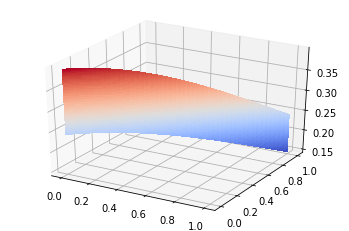

In [76]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show();

### Sorting `ndarray` values

The `ndarray` object has the `sort(<axis>)` method for sorting array values by a variety of axes. The default argument for the `axis` argument is `-1` which means sort by the last index.

In [84]:
arr3 = np.array([[3,5,8,1],[4,0,1,10],[9,3,6,2],[11,0,2,7]])
arr3

array([[ 3,  5,  8,  1],
       [ 4,  0,  1, 10],
       [ 9,  3,  6,  2],
       [11,  0,  2,  7]])

In [85]:
# Sort each row by value

arr3.sort(axis = 0)
arr3

array([[ 3,  0,  1,  1],
       [ 4,  0,  2,  2],
       [ 9,  3,  6,  7],
       [11,  5,  8, 10]])

In [86]:
# Sort each column by value

arr3.sort(axis = 1)
arr3

array([[ 0,  1,  1,  3],
       [ 0,  2,  2,  4],
       [ 3,  6,  7,  9],
       [ 5,  8, 10, 11]])

### Finding unique values

The function `np.unique(<array>)` returns a 1d array made up of the sorted unique elements of the array argument.

In [87]:
arr4 = np.array([1,1,1,4,3,10,-1,-1,2,-1,3,4,5,3,3,6])
arr4

array([ 1,  1,  1,  4,  3, 10, -1, -1,  2, -1,  3,  4,  5,  3,  3,  6])

In [88]:
np.unique(arr4)

array([-1,  1,  2,  3,  4,  5,  6, 10])

In [89]:
arr5 = np.array([[4,4,5,9],[1,2,3,3],[4,1,0,2],[10,-1,3,-10]])
arr5

array([[  4,   4,   5,   9],
       [  1,   2,   3,   3],
       [  4,   1,   0,   2],
       [ 10,  -1,   3, -10]])

In [90]:
np.unique(arr5)

array([-10,  -1,   0,   1,   2,   3,   4,   5,   9,  10])

## Statistical functions and methods

Many of the statistical functions from the `math` module are included as vectorized functions in NumPy. Alternatively, they are often available as methods of the `ndarray` object itself.

For a numerical array `X`, the **mean** (average) is defined as the sum of all elements of `X` divided by the total number of elements. For example, if `X` has `n` elements, then the mean is
$$
    \bar{x} = \frac{1}{n}(x_0 + x_1 + x_2 + \cdots + x_{n-1}) = \frac{1}{n}\sum_{i=0}^{n-1} x_i.
$$

**Note:** The upper-case Greek symbol $\Sigma$ is often used to indicate summation.

The **median** is defined differently depending on how many elements are in `X`. If `X` has an odd number of elements, then the median is just the middle element. If `X` has an even number of elements, then the median is the average of the two middle elements.

We will discuss the interpretation of the mean and median next week.

In [91]:
ph = np.array([7.0, 6.97, 3.48, 2.39, 9.12, 9.76, 5.55, 6.45])

In [92]:
# Mean and median

np.mean(ph), np.median(ph)

(6.34, 6.71)

In [93]:
# Note that there is no ndarray method for median

ph.mean()

6.34

Two important measures of the variability or spread of data are the standard deviation and the variance.

The standard deviation for a dataset $X$ is defined as the square root of the average of the squared sum of deviations from the mean. This is hard to read in plain English, and may be one of the few definitions that is easier to read in mathematical notation. Denote the standard deviation as $s$ and the mean as $\bar{x}$. Then, for $X = [x_0, x_1, \ldots, x_{n-1}]$, the standard deviation is
$$
    s = \sqrt{\frac{1}{n}\sum_{i=0}^{n-1} (x_i - \bar{x})^2}.
$$

The variance is defined as $s^2$. Luckily for us, NumPy provides universal functions to compute both of these statistics.

In [94]:
# Standard deviation and variance

np.std(ph), np.var(ph)

(2.3631440920942586, 5.584449999999999)

In [95]:
ph.std(), ph.var()

(2.3631440920942586, 5.584449999999999)

In [96]:
# Sum of elements

np.sum(ph)

50.72

In [97]:
ph.sum()

50.72

The cumulative sum function, called with the `np.cumsum()` syntax, returns an array of cumulative sums of elements. When an array with more than one dimension is used, the summation takes place left to right, then top to bottom.

In [98]:
# Cumulative sum

arr2 = np.arange(1,10)
np.cumsum(arr2)

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)

In [99]:
arr2.cumsum()

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)

In [100]:
arr2_2d = np.array([np.arange(1,21), 2*np.arange(1,21)])
arr2_2d

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40]])

In [101]:
np.cumsum(arr2_2d)

array([  1,   3,   6,  10,  15,  21,  28,  36,  45,  55,  66,  78,  91,
       105, 120, 136, 153, 171, 190, 210, 212, 216, 222, 230, 240, 252,
       266, 282, 300, 320, 342, 366, 392, 420, 450, 482, 516, 552, 590,
       630], dtype=int32)

In [102]:
arr2_2d.cumsum()

array([  1,   3,   6,  10,  15,  21,  28,  36,  45,  55,  66,  78,  91,
       105, 120, 136, 153, 171, 190, 210, 212, 216, 222, 230, 240, 252,
       266, 282, 300, 320, 342, 366, 392, 420, 450, 482, 516, 552, 590,
       630], dtype=int32)

Similarly, the `np.cumprod()` function returns an array of cumulative products of elements.

In [103]:
np.cumprod(arr2)

array([     1,      2,      6,     24,    120,    720,   5040,  40320,
       362880], dtype=int32)

In [104]:
arr2.cumprod()

array([     1,      2,      6,     24,    120,    720,   5040,  40320,
       362880], dtype=int32)

In [105]:
arr3 = np.array([np.arange(1,5), 2*np.arange(1,5)])

np.cumprod(arr3)

array([   1,    2,    6,   24,   48,  192, 1152, 9216], dtype=int32)

In [106]:
arr3.cumprod()

array([   1,    2,    6,   24,   48,  192, 1152, 9216], dtype=int32)

Finally, the minimum and maximum elements may be found with `np.min()` and `np.max()`, respectively. To find the location of the minimum and maximum elements, use `np.argmin()` and `np.argmax()`, respectively.

In [107]:
# Compute the minimum and maximum

np.min(arr3), np.max(arr3)

(1, 8)

In [108]:
arr3.min(), arr3.max()

(1, 8)

In [109]:
# Find the locations of the minimum and maximum

np.argmin(arr3), np.argmax(arr3)

(0, 7)

In [110]:
arr3.argmin(), arr3.argmax()

(0, 7)

In [111]:
# The above code says that the maximum is at the 7th index. Let's check.

arr3

array([[1, 2, 3, 4],
       [2, 4, 6, 8]])

## Numerical linear algebra

We'll only briefly cover this topic here. These functions work on special mathematical objects called *vectors* (1-dimensional arrays) and *matrices* (2-dimensional arrays), which can be represented using NumPy `ndarray` objects.

An alternate, more intuitive representation of matrices exists in the NumPy `matrix` object. With this object, matrix multiplication is computed using the `*` operator.

In [112]:
vec1 = np.array([1.0, -1.0, 0.0])
matrix1 = np.array([[1,2,3],[3,4,5],[6,7,10]])
matrix1

array([[ 1,  2,  3],
       [ 3,  4,  5],
       [ 6,  7, 10]])

In [113]:
matrix2 = np.matrix(matrix1)
matrix2

matrix([[ 1,  2,  3],
        [ 3,  4,  5],
        [ 6,  7, 10]])

The function `np.dot(<array1>, <array2>)` represents the dot product for vectors, or the matrix-vector or matrix-matrix product.

In [114]:
np.dot(matrix1, matrix1)

array([[ 25,  31,  43],
       [ 45,  57,  79],
       [ 87, 110, 153]])

In [115]:
matrix2*matrix2

matrix([[ 25,  31,  43],
        [ 45,  57,  79],
        [ 87, 110, 153]])

In [116]:
np.dot(vec1, matrix1)

array([-2., -2., -2.])

In [117]:
np.dot(vec1, vec1)

2.0

To get the elements on the diagonal of a matrix (i.e. the elements corresponding to the indices `[0,0],[1,1],[2,2]`, etc), use the function `np.diag(<matrix>)`.

In [118]:
np.diag(matrix1)

array([ 1,  4, 10])

Also, we can get the sum of the diagonal elements of a matrix using `np.trace(<matrix>)`.

In [119]:
np.trace(matrix1)

15

Other extremely useful functions for linear algebra are listed below. These functions use the `linalg` module contained in NumPy.

|Function|Details|
|---|---|
|`np.linalg.inv(<matrix>)`|Returns the inverse of the matrix.|
|`np.linalg.pinv(<matrix>)`|Returns the Moore-Penrose pseudoinverse of the matrix.|
|`np.linalg.det(<matrix>)`|Returns the determinant of the matrix. *Note:* the matrix must be square.|
|`np.linalg.eig(<matrix>)`|Returns a multidimensional array. The `0` element is an array containing the eigenvalues, and the `1` element is a matrix where each column corresponds to an eigenvector.|
|`np.linalg.norm(<matrix/vector>, <order>)`|Computes the norm of the specified order (see exercises for more precise definition of the norm). The default order is `2`|
|`np.linalg.solve(A,b)`|Computes the solution to `Ax = b`. Returns the 1d array `x`.|
|`np.linalg.lstsq(A,b)`|Computes the least-squares solution to `Ax = b`. Returns the 1d array `x`.|
|`np.linalg.qr(<matrix>)`|Returns the QR decomposition of the matrix. Q and R are both 2-dimensional arrays.|
|`np.linalg.svd(<matrix>)`|Returns the singular value decomposition of the matrix. The result is two 2d arrays corresponding to the matrices $U$ and $V$, and a 1d array for the singular values in $\Sigma$.|

Often it is more convenient to `import numpy.linalg as LA` and then call the above functions as `LA.<function>(<matrix>)`.

In [120]:
np.linalg.inv(matrix1)

array([[-1.25, -0.25,  0.5 ],
       [ 0.  ,  2.  , -1.  ],
       [ 0.75, -1.25,  0.5 ]])

In [121]:
np.linalg.pinv(matrix1)

array([[-1.25000000e+00, -2.50000000e-01,  5.00000000e-01],
       [ 3.33066907e-16,  2.00000000e+00, -1.00000000e+00],
       [ 7.50000000e-01, -1.25000000e+00,  5.00000000e-01]])

In [122]:
np.linalg.det(matrix1)

-4.0

In [123]:
np.linalg.eig(matrix1)

(array([15.30952782, -0.68883045,  0.37930263]),
 array([[ 0.24291864,  0.89755782,  0.12241577],
        [ 0.44541666, -0.12268696, -0.8372959 ],
        [ 0.86173925, -0.42348302,  0.53286955]]))

In [124]:
np.linalg.norm(matrix1)

15.7797338380595

In [125]:
np.linalg.solve(matrix1, vec1)

array([-1., -2.,  2.])

In [126]:
np.linalg.lstsq(matrix1, vec1, rcond = None)

(array([-1., -2.,  2.]),
 array([], dtype=float64),
 3,
 array([15.76085203,  0.67343723,  0.37686272]))

In [127]:
Q, R = np.linalg.qr(matrix1)
np.dot(Q,R)

array([[ 1.,  2.,  3.],
       [ 3.,  4.,  5.],
       [ 6.,  7., 10.]])

In [128]:
np.linalg.svd(matrix1)

(array([[-0.23376096,  0.96800092,  0.09126904],
        [-0.44813724, -0.02396175, -0.89364358],
        [-0.86286084, -0.24980004,  0.43939858]]),
 array([15.76085203,  0.67343723,  0.37686272]),
 array([[-0.42861501, -0.52662741, -0.73413401],
        [-0.89493796,  0.13595118,  0.42497449],
        [ 0.12399683, -0.83915484,  0.52956958]]))

## Random number generation

NumPy also contains a useful collection of random number generators in its `random` module. The simplest functions in this module are `np.random.seed()` and `np.random.shuffle()`. The `seed()` function sets the random seed for generating numbers. Often the seed is set by the programmer while writing prototype scripts so that results are consistent across test runs. For example, by setting the seed here, we will always generate the same random numbers each time this notebook is run.

The shuffle function has the syntax `np.random.shuffle(<array>)`. This function only shuffles elements horizontally, so 1d arrays have their elements shuffled, while 2d arrays only have their *rows* shuffled.

In [129]:
np.random.seed(1000)

In [130]:
arr = np.arange(10)
np.random.shuffle(arr)
arr

array([2, 6, 5, 1, 4, 9, 0, 8, 7, 3])

In [132]:
arr1 = np.array([np.arange(3),np.arange(6,9),np.arange(25,28)])
np.random.shuffle(arr1)
arr1

array([[25, 26, 27],
       [ 6,  7,  8],
       [ 0,  1,  2]])

The `np.random.permutation()` function randomly *permutes* elements of an array. This is very similar to shuffling, only it has the flexibility of allowing either integer or array arguments. If an integer is passed to the function, then a random permutation of an `arange()` is returned. If an array is passed to the function, then the array is shuffled horizontally as with `np.random.shuffle()`.

The other significant difference between `shuffle()` and `permutation()` is that `shuffle()` will actually change the array passed in, while `permutation()` will create a copy of the array.

In [133]:
np.random.permutation(10)

array([5, 7, 3, 6, 0, 1, 2, 8, 9, 4])

In [134]:
np.random.permutation(arr1)
arr1

array([[25, 26, 27],
       [ 6,  7,  8],
       [ 0,  1,  2]])

We may random select elements of a 1d array using the `np.random.choice()` function. The second argument `size` specifies the number and shape of the returned selection.

The random selection is done *with replacement*, meaning we may select the same element more than once.

In [135]:
arr

array([2, 6, 5, 1, 4, 9, 0, 8, 7, 3])

In [136]:
np.random.choice(arr, size = 3)

array([5, 9, 9])

In [137]:
np.random.choice(arr, size = (3,3))

array([[4, 2, 4],
       [5, 9, 4],
       [8, 2, 4]])

The `random` module also has the capacity to sample points from various statistical distributions. Some of the many distributions supported are the uniform, normal, binomial, beta, $\chi^2$, and gamma distributions. A complete list of supported distributions is available in the [official documentation](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html).

In [138]:
# Sample 10 points from the uniform distribution on the half-open interval [0,1).
np.random.rand(10)

array([0.84241124, 0.19874506, 0.02072272, 0.60165179, 0.97091916,
       0.73213217, 0.73639381, 0.00564072, 0.29116439, 0.74535564])

In [139]:
# Sample 10 points from the normal distribution with mean 0, variance 1.
np.random.randn(10)

array([-0.22108835, -1.3935994 , -0.31183985,  0.33918756,  1.0769568 ,
       -1.39434027,  1.03460727,  1.46655123,  0.29225828, -0.71470798])

In [144]:
# Sample 10 points from the normal distribution with mean and standard deviation specified.
np.random.normal(100, 15, size = 10)

array([ 97.74729135, 121.79166353,  84.5454738 , 123.56949277,
        96.71414927, 105.91205118, 101.13237425,  95.60083419,
       130.64987814, 110.08919008])

In [145]:
# Uniformly sample 10 integers between 1 and 10.
np.random.randint(1, 10, size = 10)

array([6, 3, 2, 1, 7, 9, 7, 2, 2, 1])

In [146]:
# Uniformly sample 9 random integers between 1 and 100 and
# put them into a 2d array.
np.random.randint(1, 100, size = (3,3))

array([[89, 85, 35],
       [99, 34, 73],
       [29, 99, 49]])

In [147]:
# Sample 10 points from the binomial distribution with n = 10, p = 0.1.
print('Binomial: ', np.random.binomial(10, p = 0.1, size = 10),'\n')

# Sample 10 points from the beta distribution with a = 1, b = 2.
print('Beta: ', np.random.beta(a = 1, b = 2, size = 10), '\n')

# Sample 10 points from the chi^2 distribution with 4 degrees of freedom.
print('Chi^2: ', np.random.chisquare(4, size = 10), '\n')

# Sample 9 points from the gamma distribution with shape = 2; put them in a 3x3 array.
print('Gamma: ', np.random.gamma(shape = 2, size = (3,3)))

Binomial:  [0 1 3 0 0 3 0 0 4 1] 

Beta:  [0.06041005 0.67482576 0.01449268 0.16705654 0.22147126 0.74173568
 0.3374235  0.12752882 0.67652371 0.19996605] 

Chi^2:  [2.44639946 2.34435576 3.371432   3.17889914 3.05384736 3.32198373
 3.23626648 1.27004105 1.17486937 3.99262198] 

Gamma:  [[1.02769615 1.72864283 0.36084729]
 [6.28265342 5.61446888 0.46862382]
 [0.5868505  1.34737626 0.85192808]]


## Loading images into Python

There are several packages available for dealing with image data (PNG, JPG, TIFF, GIF, etc) in Python. While there are more sophisticated packages out there, Matplotlib is simple, comes with Anaconda distribution, and is built on top of NumPy. 

We'll use the `image` module of Matplotlib to read an image into Python as a NumPy array. Similar to Matlab, the function to do this is `image.imread()`. We'll also import the `pyplot` module from Matplotlib to display our image once we've loaded it in.

**Note:** Including the cell magic `%matplotlib inline` is to allow any plots from Matplotlib to be shown directly after the cell in which they are generated and called.

In [2]:
%matplotlib inline

import matplotlib.image as mp
import matplotlib.pyplot as plt

im1 = mp.imread('cameraman.jpg')
im1

array([[156, 159, 158, ..., 151, 152, 152],
       [160, 154, 157, ..., 154, 155, 153],
       [156, 159, 157, ..., 151, 152, 152],
       ...,
       [114, 132, 124, ..., 135, 137, 114],
       [121, 126, 130, ..., 133, 130, 113],
       [121, 126, 130, ..., 132, 130, 113]], dtype=uint8)

In [149]:
im1.shape

(256, 256)

Thus, we see that the image has been loaded in as a 2d `ndarray`, with data type `uint8` (unsigned 8-bit integers). The significance of `uint8` is that the pixel values are stored as integer values ranging from $0$ to $2^8 - 1 = 255$. This corresponds to a grayscale image.

**Note:** It is also possible to load an RGB (Red-Green-Blue) color image into Python using the exact same method. The only difference is that color images have shape `(<width>, <height>, 3)`, where each of the `3` sub-images corresponds to a single color.

When we display the image, the default colormap makes the picture look a little strange.

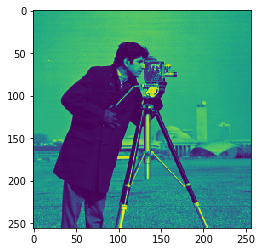

In [150]:
plt.imshow(im1);

This coloring can be corrected by specifying the keyworded argument `cmap = 'gray'`.

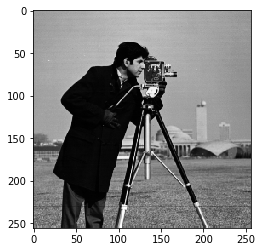

In [151]:
plt.imshow(im1, cmap = 'gray');

# Summary

* **Data Analysis** is the process of obtaining, cleaning, transforming, and processing data with the goal of extracting useful information.
* NumPy is the foundational package for mathematical operations in Python. The fundamental object of NumPy is the `ndarray`.
* Use `np.zeros(<shape>)`, `np.ones(<shape>)`, or `np.empty(<shape>)` for generating zero arrays, arrays of ones, or empty arrays, respectively.
* The array version of `range()` is `np.arange()`.
* Vectorized operations and functions (**universal** functions) are significantly faster than pure Python.
* `np.where()` is used to vectorize Python conditional statements
* `ndarray` objects are indexed and sliced similarly to `list` objects.
* The `np.meshgrid()` object is used to compute function values over a grid.
* NumPy has strong support for numerical linear algebra.
* The `random` module in NumPy allows sampling from a wide range of distributions.
* Images can be read as NumPy arrays using Matplotlib's `image` module.

# *Exercises*

1. One way to measure the 'size' of a 1-dimensional array $x$ with $n$ components is the *2-norm*. Keeping in mind Python's zero-indexing, the 2-norm is given by:
$$
    ||x||_2 = \sqrt{\sum_{i=0}^{n-1} x_i^2 }.
$$
   Other definitions of the norm exist, such as the 1-norm, given by
$$
    ||x||_1 = \sum_{i=0}^{n-1} |x_i|,
$$
   where the vertical bars $|\cdot|$ denote the absolute value, and the infinity-norm, given by
$$
    ||x||_\infty = \max_i |x_i|.
$$
   Write functions for each of these norms, and find the value of each norm for the array
$$
   x = [ 10.0, -12.3, 13.5, 11.91, 16.57, 3.45, 2.0, -14.6, -16.58 ]
$$
   
   Compare your results with the NumPy function `np.linalg.norm(<array>, <order>)`. **Hint:** Use `np.inf` to indicate 'infinity' for the infinity-norm.

In [162]:
def two_norm(vector):
    """ Compute the 2-norm. """
    return np.sqrt(np.sum(vector**2))

def one_norm(vector):
    """ Compute the 1-norm. """
    return (np.abs(vector)).sum()

def infinity_norm(vector):
    """ Compute the infinity norm. """
    return np.max(np.abs(vector))

x = np.array([10.0, -12.3, 13.5, 11.91, 16.57, 3.45, 2.0, -14.6, -16.58])
print('{:.2f}, {:.2f}, {:.2f}'.format(two_norm(x), one_norm(x), infinity_norm(x)))
print('{:.2f}, {:.2f}, {:.2f}'.format(np.linalg.norm(x, 2), np.linalg.norm(x, 1), np.linalg.norm(x, np.inf)))

36.80, 100.91, 16.58
36.80, 100.91, 16.58


2. Using `np.where()`, vectorize the following function:
```
def heaviside(theta, x):
    if x >= theta:
        return 1
    else:
        return 0
```

In [152]:
test_array = np.random.rand(25)
test_array

array([0.96033211, 0.03140072, 0.67035487, 0.96499756, 0.90759126,
       0.20783989, 0.84988675, 0.54860406, 0.03605308, 0.90437934,
       0.20203493, 0.61341888, 0.66927239, 0.70565002, 0.70392326,
       0.10060431, 0.20619924, 0.57079344, 0.64253198, 0.7487717 ,
       0.86196072, 0.85955854, 0.66907501, 0.37501531, 0.17141326])

In [156]:
def heaviside(theta, x):
    """ Vectorized Heaviside function. 
    
        If the x values are greater than or equal to theta,
        place 1 in the returned array. Otherwise, place 0.
    """
    
    return np.where(x >= theta, 1, 0)

heaviside(0.3, test_array)

3. Create an array of 1000 points from the binomial distribution with `n = 1` and `p = 0.3` (this could represent 1000 flips of a biased coin). **Use `np.round()` on this generated array.** Then, using either boolean indexing or `np.where()`, generate a second array that replaces every 0 value with -1. Finally, find the sum of your new array.

In [22]:
def sum_binomial(num_outcomes, N_trials, p_heads):
    """ Sum an array of binomial values. 
    
        Convert 0 to -1, then sum the values.
    """
    
    points = np.round(np.random.binomial(n = num_outcomes, p = p_heads, size = N_trials))
    
    points_transf = np.where(points < 1, -1, 1)
    return points_transf.sum()

sum_binomial(1, 1000, 0.3)

-408

4. This exercise will be completed in steps.

   a) Create a NumPy array of zeros with shape `(65,65)`. Call this array `circle1`.
    
   b) Create a boolean mask using the indices of `circle1` using the following rule: for every point in `circle1` a distance of `5` units away from `circle1[33,33]`, set the value to `1`, otherwise set the mask value to `0`. Call this mask `mask1`.
    
   c) Add `circle1` and `mask1`, and plot the result.

$(x-c)^2 + (y-c)^2 = 5^2$

In [40]:
circle1 = np.zeros((65,65))

for i in range(65):
    for j in range(65):
        if (i - 33)**2 + (j - 33)**2 == 25:
            circle1[i,j] = 1

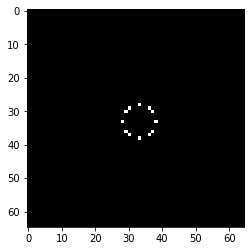

In [41]:
plt.imshow(circle1, cmap = 'gray');

5. Use the function below to load the Modified National Institute of Standards and Technology (MNIST) dataset into Python. This dataset consists of 70000 28x28 pixel examples of handwritten digits from 0-9, and is often used for testing image classification algorithms. The data is separated into 3 subsets: 50000 `training` images, 10000 `testing` images, and 10000 `evaluation` images. 

   a) Plot one or two of the images to see what they look like.
   
   b) The image data often needs to be reshaped to be passed to classification algorithms. Reshape the image subsets from 28x28 to 784x1.

In [42]:
def load_mnist():
    """ This function loads the MINST dataset into a list of NumPy arrays. """
    
    import pickle
    import gzip
    
    with gzip.open('mnist.pkl.gz', 'rb') as binary_file:
        tr, te, va = pickle.load(binary_file, encoding = 'latin1')
        
    return [i.reshape((28,28)) for i in tr[0]], [i.reshape((28,28)) for i in te[0]], [i.reshape((28,28)) for i in va[0]]

train, test, valid = load_mnist()

In [45]:
train[0].shape

(28, 28)

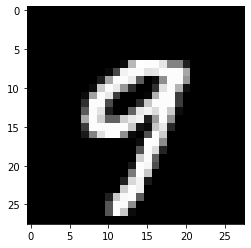

In [49]:
plt.imshow(train[45], cmap = 'gray');

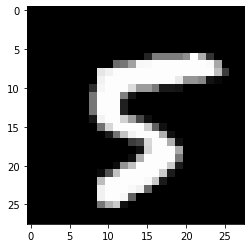

In [54]:
plt.imshow(test[5010], cmap = 'gray');

In [56]:
train = [image.reshape((784,1)) for image in train]
test = [image.reshape((784,1)) for image in test]
valid = [image.reshape((784,1)) for image in valid]

6. For certain data processing techniques, arrays often need to be *zero-padded*. This means that, given an array of shape `(m,n)`, a 'border' of zeros of a specified width is appended to the array. For example, if we had an array with shape `(2,2)`, it might look like this:
```
array([[a b], 
       [c d]], dtype=int32)
```
    If we wanted to *zero-pad* this array with a border of width `2`, the result would be:
```
array([[0 0 0 0 0 0],
        [0 0 0 0 0 0],
        [0 0 a b 0 0],
        [0 0 c d 0 0],
        [0 0 0 0 0 0],
        [0 0 0 0 0 0]], dtype=int32)
```
    Write a function that takes in an array and an integer `p`. Have your function return the zero-padded array with a border of width `p`.

In [65]:
def zero_pad(arr, p):
    """ Return a zero-padded array with border width p. """
    
    rows, cols = arr.shape
    
    padded = np.zeros((rows + 2*p, cols + 2*p))
    
    padded[p:p+rows, p:p+cols] = arr
    return padded

ar1 = np.array([[1,2],[3,4]])
zero_pad(ar1, 2)

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 2., 0., 0.],
       [0., 0., 3., 4., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

# References

McKinney, W. (2013). *Python for Data Analysis*. O'Reilly Media: Sebastopol, California.